In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hottbox.core import Tensor

[Return to Table of Contents](./0_Table_of_contents.ipynb)

# Tensors and basic operations

<img src="./imgs/tensors_dogs.jpg" alt="Drawing" style="width: 500px;"/>

A tensor is a multi-dimenaional array of data where each dimension is conventionally referred to as the **mode**. Tensor order is defined by the number of its modes which is equivivalent to the number of indices required to identify a particular entry of a multi-dimensional array. For ease of visualisation and compact notation, we consider a third order tensor $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$. Thus, an element of such a tensor, $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$, can be written in a general form as:

$$ x_{ijk} = \mathbf{\underline{X}}[i, j, k]$$

> **Note:** In order to be consistent with Python indexing, count of modes and elements within starts from zeros.

Creation of a tensor starts with a formation of a multidimensional array of data.

In [3]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Result preview
print(tensor)
tensor.data

This tensor is of order 3 and consists of 24 elements.
Sizes and names of its modes are (2, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## **Assigment 1**

1. Create a tensor of order 5 (of any shape) and with all its values equal to 5. Then, calculate its Frobenious norm. 
2. Construct several tensors of orders varying from 3 to 20, with the size of each dimension equal to 2. Plot the relation between an order of a tensor and the number of its elements.
3. Construct several tensors of order 3 with the size of each dimension varying from 3 to 15. Plot the relation between the size of dimensions of a tensor and the number of its elements.
4. Analyse and compare the so obtained graphs.

### Solution: Part 1

In [4]:
# Create a tensor
array_5d = np.ones([5, 2, 4, 1, 2]) * 5
tensor = Tensor(array_5d)

# Result preview
print(tensor)
tensor.data
tensor

This tensor is of order 5 and consists of 80 elements.
Sizes and names of its modes are (5, 2, 4, 1, 2) and ['mode-0', 'mode-1', 'mode-2', 'mode-3', 'mode-4'] respectively.


This tensor is of order 5 and consists of 80 elements.
Sizes and names of its modes are (5, 2, 4, 1, 2) and ['mode-0', 'mode-1', 'mode-2', 'mode-3', 'mode-4'] respectively.

In [5]:
# Calculate Frobenious norm
f_norm = np.linalg.norm(tensor.data) # default noram is 2
print(f_norm)

44.721359549995796


### Solution: Part 2

In [6]:
# Create tensors and collect information
mtx = np.zeros([2, 20])
for order in range(20):
    tensor_dim = []
    order = order+1
    for i in range(order):
        tensor_dim.append(2)
    tensor = Tensor(np.ones(tensor_dim))
    mtx[0, order-1] = order
    mtx[1, order-1] = np.sum(tensor.data)
    

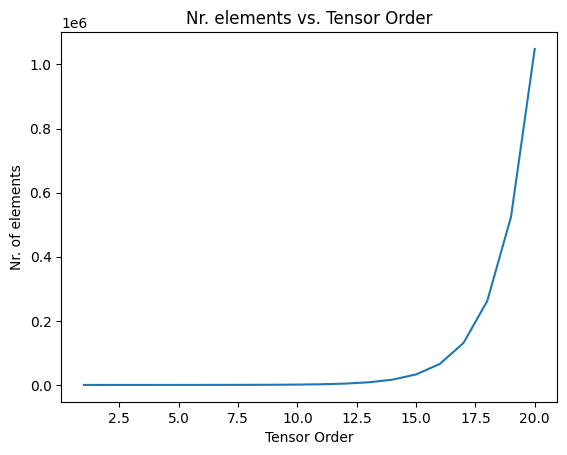

In [7]:
# Plot results
plt.plot(mtx[0, :], mtx[1, :])
plt.xlabel('Tensor Order')
plt.ylabel('Nr. of elements')
plt.title('Nr. elements vs. Tensor Order')
plt.show()

### Solution: Part 3

In [8]:
# Create tensors and collect information
mtx = np.zeros([2, 15])
for size in range(15):
    array = np.ones([size, size, size])
    tensor = Tensor(array)
    mtx[0, size] = size+1
    mtx[1, size] = np.sum(tensor.data)

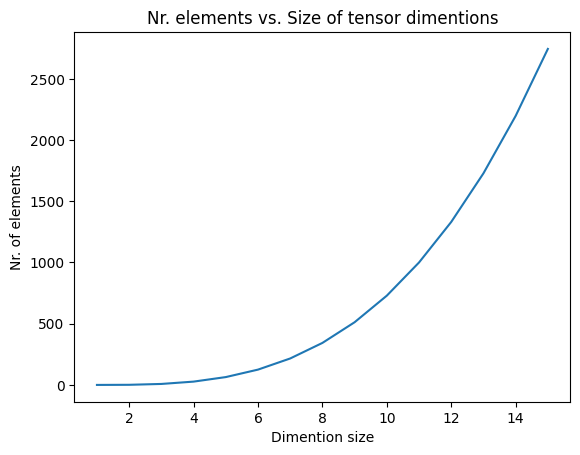

In [9]:
# Plot results
plt.plot(mtx[0, :], mtx[1, :])
plt.xlabel('Dimention size')
plt.ylabel('Nr. of elements')
plt.title('Nr. elements vs. Size of tensor dimentions')
plt.show()

### Solution: Part 4

**By looking at the plots, it is clear that increasing the tensor order results in a much greater number of elements. This behavior reflects Bellman's curse of dimentionality, which highlights that in order to estimate a function with a given level of accuracy, the number of samples needed grows exponentially with respect to the dimentionality of the function itself.**



# Most common tensor substructures
<img src="./imgs/tensor_substructures.png" alt="Drawing" style="width: 500px;"/>

1. A **fiber** is a vector obtained by fixing all but one of the indices, e.g.  $\mathbf{\underline{X}}[i,:,k]$ is the mode-2 fiber $\mathbf{\underline{X}}$ (usually refered to as row fiber). 

1. Fixing all but two of the indices yields a matrix called a **slice** of a tensor, e.g. $\mathbf{\underline{X}}[:,:,k]$ is the mode-[1,2] slice (usually refered to as the frontal slice).

**Note:** The same principles and definitions can be applied to a tensor of an arbitrarily large order. In addition, you can obtain a **subtensor** by fixing at least three indices and letting the remaining ones vary.

In [10]:
# Mode-2 fiber
tensor.data[0,1,:]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
# Frontal slice
tensor.data[0,:,:]

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

## **Assigment 2**

1. Create a tensor of order 4 which consists of 81 elements and display all its horizontal slices and any five row fibers.
2. Create a tensor of order 3 and shape `(4,2,5)`, where the values of each consequent frontal slice are doubled.

### Solution: Part 1

In [12]:
# Create a tensor of order 4
array_4d = np.arange(81).reshape((3, 3, 3, 3))
tensor = Tensor(array_4d)
print(tensor)

This tensor is of order 4 and consists of 81 elements.
Sizes and names of its modes are (3, 3, 3, 3) and ['mode-0', 'mode-1', 'mode-2', 'mode-3'] respectively.


In [13]:
# Display slices
for i in range(3):
    for t in range(3):
        print('First dim: ', i)
        print('Fourth dim: ', t)
        slice = tensor.data[i,:,:, t]
        print(slice)


First dim:  0
Fourth dim:  0
[[ 0  3  6]
 [ 9 12 15]
 [18 21 24]]
First dim:  0
Fourth dim:  1
[[ 1  4  7]
 [10 13 16]
 [19 22 25]]
First dim:  0
Fourth dim:  2
[[ 2  5  8]
 [11 14 17]
 [20 23 26]]
First dim:  1
Fourth dim:  0
[[27 30 33]
 [36 39 42]
 [45 48 51]]
First dim:  1
Fourth dim:  1
[[28 31 34]
 [37 40 43]
 [46 49 52]]
First dim:  1
Fourth dim:  2
[[29 32 35]
 [38 41 44]
 [47 50 53]]
First dim:  2
Fourth dim:  0
[[54 57 60]
 [63 66 69]
 [72 75 78]]
First dim:  2
Fourth dim:  1
[[55 58 61]
 [64 67 70]
 [73 76 79]]
First dim:  2
Fourth dim:  2
[[56 59 62]
 [65 68 71]
 [74 77 80]]


In [14]:
# Display fibers
fibre_1 = tensor.data[0,:,0, :] # row fibre 1
print(fibre_1)
fibre_2 = tensor.data[1,:,0, :] # row fibre 2
print(fibre_2)
fibre_3 = tensor.data[2,:,0, :] # row fibre 3
print(fibre_1)
fibre_4 = tensor.data[1,:,2, :] # row fibre 3
print(fibre_4)
fibre_5 = tensor.data[1,:,1, :] # row fibre 3
print(fibre_5)

[[ 0  1  2]
 [ 9 10 11]
 [18 19 20]]
[[27 28 29]
 [36 37 38]
 [45 46 47]]
[[ 0  1  2]
 [ 9 10 11]
 [18 19 20]]
[[33 34 35]
 [42 43 44]
 [51 52 53]]
[[30 31 32]
 [39 40 41]
 [48 49 50]]


### Solution: Part 2

In [15]:
# Create a tensor of order 3
array_3d = np.ones([4, 2, 5])
tensor = Tensor(array_3d)
tensor.data[:,:,1] = 2
tensor.data[:,:,2] = 4
print(tensor.data)

[[[1. 2. 4. 1. 1.]
  [1. 2. 4. 1. 1.]]

 [[1. 2. 4. 1. 1.]
  [1. 2. 4. 1. 1.]]

 [[1. 2. 4. 1. 1.]
  [1. 2. 4. 1. 1.]]

 [[1. 2. 4. 1. 1.]
  [1. 2. 4. 1. 1.]]]


# Unfolding

Conventionally, unfolding is considered to be a process of element mapping from a tensor to a matrix. In other words, it arranges the mode-$n$ fibers of a tensor to be the matrix columns. Thus, the mode-$n$ unfolding is denoted as:

$$\mathbf{\underline{A}} \xrightarrow{n} \mathbf{A}_{(n)}$$

Thus, this operations requires to specify a mode along which a tensor will be unfolded. For a third order tensor, a visual representation of such operation is as following

<img src="./imgs/unfolding.png" alt="Drawing" style="width: 600px;"/>

In `hottbox` this functionality is available through the corresponding methods of the `Tensor` object, for instance:

In [16]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Unfolding of a tensor
tensor.unfold(mode=0)

# Result preview
print(tensor)
tensor.data

This tensor is of order 2 and consists of 24 elements.
Sizes and names of its modes are (2, 12) and ['mode-0', 'mode-1_mode-2'] respectively.


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

## **Assigment 3**

1. Create a tensor, $\mathbf{\underline{A}}$, of order 4, in such a way that its version unfolded along the second mode would have sizes `(5,72)`, that is $\mathbf{A}_{(n)} \in  \mathbb{R}^{5 \times 72}$. Validate your results by displaying the unfolded tensor.

### Solution : Part 1

In [17]:
# Create a tensor
array_4d = np.arange(360).reshape(6, 5, 4, 3)
tensor = Tensor(array_4d)

unfolded_tensor = tensor.unfold(mode=1) # second mode --> firt dim is 1
print('The shape of the unfolded tensor is: ', tensor.shape)
unfolded_tensor

The shape of the unfolded tensor is:  (5, 72)


This tensor is of order 2 and consists of 360 elements.
Sizes and names of its modes are (5, 72) and ['mode-1', 'mode-0_mode-2_mode-3'] respectively.

In [18]:
# Display unfolded version
print(unfolded_tensor.data)

[[  0   1   2   3   4   5   6   7   8   9  10  11  60  61  62  63  64  65
   66  67  68  69  70  71 120 121 122 123 124 125 126 127 128 129 130 131
  180 181 182 183 184 185 186 187 188 189 190 191 240 241 242 243 244 245
  246 247 248 249 250 251 300 301 302 303 304 305 306 307 308 309 310 311]
 [ 12  13  14  15  16  17  18  19  20  21  22  23  72  73  74  75  76  77
   78  79  80  81  82  83 132 133 134 135 136 137 138 139 140 141 142 143
  192 193 194 195 196 197 198 199 200 201 202 203 252 253 254 255 256 257
  258 259 260 261 262 263 312 313 314 315 316 317 318 319 320 321 322 323]
 [ 24  25  26  27  28  29  30  31  32  33  34  35  84  85  86  87  88  89
   90  91  92  93  94  95 144 145 146 147 148 149 150 151 152 153 154 155
  204 205 206 207 208 209 210 211 212 213 214 215 264 265 266 267 268 269
  270 271 272 273 274 275 324 325 326 327 328 329 330 331 332 333 334 335]
 [ 36  37  38  39  40  41  42  43  44  45  46  47  96  97  98  99 100 101
  102 103 104 105 106 107 156 157 1

# Mode-n product 
<img src="./imgs/mode_n_product.png" alt="Drawing" style="width: 600px;"/>

The mode-$n$ product is a multiplication of a tensor  by a matrix along the $n^{th}$ mode of a tensor. This essentially means that each mode-$n$ fiber should be multiplied by this matrix. Mathematically, this can be expressed as:

$$\mathbf{\underline{X}} \times_n \mathbf{A} = \mathbf{\underline{Y}} \quad \Leftrightarrow  \quad \mathbf{Y}_{(n)} = \mathbf{A} \mathbf{X}_{(n)}  $$

In [19]:
I, J, K = 2, 3, 4
J_new = 5

# Create tensor
array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)

# Create matrix
A = np.arange(J_new * J).reshape(J_new, J)

# Performs Mode-n product 
Y = X.mode_n_product(A, mode=1, inplace=False)

# Preview of resulting tensor
print(Y)

# Preview of its unfolded version
Y.unfold(mode=1, inplace=False).data

This tensor is of order 3 and consists of 40 elements.
Sizes and names of its modes are (2, 5, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[ 20,  23,  26,  29,  56,  59,  62,  65],
       [ 56,  68,  80,  92, 200, 212, 224, 236],
       [ 92, 113, 134, 155, 344, 365, 386, 407],
       [128, 158, 188, 218, 488, 518, 548, 578],
       [164, 203, 242, 281, 632, 671, 710, 749]])

## **Assignment 4**

1. Perform the mode-$n$ product of a 3-rd order tensor, $\mathbf{\underline{X}}$, with a matrix, $\mathbf{A} \in  \mathbb{R}^{5 \times 4}$, provided that the resulting tensor, $\mathbf{\underline{Y}}$, consists of `100` elements. Validate your results. 

> **Note:** You are encouraged to experiment with the optional parameter `inplace` and to investigate its effect on the result.

### Solution: Part 1

In [20]:
# Create original tensor 
I, J, K = 2, 3, 5

array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)
X

This tensor is of order 3 and consists of 30 elements.
Sizes and names of its modes are (2, 3, 5) and ['mode-0', 'mode-1', 'mode-2'] respectively.

In [21]:
# Create matrix
J_new = 10
A = np.arange(J_new * J).reshape(J_new, J)
A

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23],
       [24, 25, 26],
       [27, 28, 29]])

In [22]:
# Perform mode-n product 
Y = X.mode_n_product(A, mode=1, inplace=False)
print(Y)

This tensor is of order 3 and consists of 100 elements.
Sizes and names of its modes are (2, 10, 5) and ['mode-0', 'mode-1', 'mode-2'] respectively.


In [23]:
# Validate equivalence between the left and right hand side
Y.unfold(mode=1, inplace=False).data

array([[  25,   28,   31,   34,   37,   70,   73,   76,   79,   82],
       [  70,   82,   94,  106,  118,  250,  262,  274,  286,  298],
       [ 115,  136,  157,  178,  199,  430,  451,  472,  493,  514],
       [ 160,  190,  220,  250,  280,  610,  640,  670,  700,  730],
       [ 205,  244,  283,  322,  361,  790,  829,  868,  907,  946],
       [ 250,  298,  346,  394,  442,  970, 1018, 1066, 1114, 1162],
       [ 295,  352,  409,  466,  523, 1150, 1207, 1264, 1321, 1378],
       [ 340,  406,  472,  538,  604, 1330, 1396, 1462, 1528, 1594],
       [ 385,  460,  535,  610,  685, 1510, 1585, 1660, 1735, 1810],
       [ 430,  514,  598,  682,  766, 1690, 1774, 1858, 1942, 2026]])

# Properties of mode-n product

1. For distinct modes in a series of multiplications, the order of the multiplication is irrelevent: 

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_m \mathbf{B} = \mathbf{\underline{X}} \times_m \mathbf{B} \times_n \mathbf{A} \quad (m \neq n)$$

1. However, this does not hold if the modes are the same :

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{X}} \times_n (\mathbf{B}\mathbf{A})$$

## **Assignment 5**

1. Validate both of the above properties empirically 
2. Prove the second property analytically

> **Note:** Be aware of consequences of the optional parameter `inplace` (its default value is set to `True`).

### Solution: Part 1

In [43]:
# Create tensor
tensor = Tensor(np.arange(16).reshape((2,2,4)))
print(tensor)

This tensor is of order 3 and consists of 16 elements.
Sizes and names of its modes are (2, 2, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


In [47]:
# Create matrices
A = np.arange(10).reshape(5,2)
B = np.arange(12).reshape(6,2)

In [41]:
# Validate property 1
# changing modes:
res_AB = tensor.mode_n_product(A, mode=0, inplace=False) 
res_AB = res_AB.mode_n_product(B, mode=1, inplace=False)
res_BA = tensor.mode_n_product(B, mode=1, inplace=False)
res_BA = res_BA.mode_n_product(A, mode=0, inplace=False)

print(res_AB)
print(res_AB.data)
print(res_BA)
print(res_BA.data)

This tensor is of order 3 and consists of 120 elements.
Sizes and names of its modes are (5, 6, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.
[[[  12   13   14   15]
  [  52   57   62   67]
  [  92  101  110  119]
  [ 132  145  158  171]
  [ 172  189  206  223]
  [ 212  233  254  275]]

 [[  44   49   54   59]
  [ 180  205  230  255]
  [ 316  361  406  451]
  [ 452  517  582  647]
  [ 588  673  758  843]
  [ 724  829  934 1039]]

 [[  76   85   94  103]
  [ 308  353  398  443]
  [ 540  621  702  783]
  [ 772  889 1006 1123]
  [1004 1157 1310 1463]
  [1236 1425 1614 1803]]

 [[ 108  121  134  147]
  [ 436  501  566  631]
  [ 764  881  998 1115]
  [1092 1261 1430 1599]
  [1420 1641 1862 2083]
  [1748 2021 2294 2567]]

 [[ 140  157  174  191]
  [ 564  649  734  819]
  [ 988 1141 1294 1447]
  [1412 1633 1854 2075]
  [1836 2125 2414 2703]
  [2260 2617 2974 3331]]]
This tensor is of order 3 and consists of 120 elements.
Sizes and names of its modes are (5, 6, 4) and ['mode-0', 'mode-1'

In [53]:
# Validate property 2
B = np.arange(10).reshape(2,5)
res_1 = tensor.mode_n_product(A, mode=0, inplace=False) 
res_1 = res_1.mode_n_product(B, mode=0, inplace=False)
res_2 = tensor.mode_n_product(np.matmul(B, A), mode=0, inplace=False) 

print(res_1)
print(res_1.data)
print(res_2)
print(res_2.data)

This tensor is of order 3 and consists of 16 elements.
Sizes and names of its modes are (2, 2, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.
[[[ 560  690  820  950]
  [1080 1210 1340 1470]]

 [[1560 1915 2270 2625]
  [2980 3335 3690 4045]]]
This tensor is of order 3 and consists of 16 elements.
Sizes and names of its modes are (2, 2, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.
[[[ 560  690  820  950]
  [1080 1210 1340 1470]]

 [[1560 1915 2270 2625]
  [2980 3335 3690 4045]]]


### Solution: Part 2

Use [LaTeX syntax](https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook) for analytical deriviations for the second property below.


In [14]:
%%latex

The property to be proven states the following: 
    \begin{equation}
        \mathbf{X \times_n A \times_n B = X \times_n(BA)}
    \end{equation}
    
    
    
It can proven starting from the following eqvivalence (presented in assignment 3, 'Mode-n product' section), and multiplying both sides by B:
    \begin{align}
        &\mathbf{X \times_n A = Y \rightarrow{} Y_{(n)} = AX_{(n)}} \;\;\;\;\;\; (1)\\
        &\mathbf{X \times_n A \times_n B = Y \times_n B \rightarrow{} BY_{(n)} = BAX_{(n)}}
    \end{align}
    
Letting the last two consecutive equations be equal to \(\mathbf{Z}\) and \(\mathbf{Z_{(n)}}\) respectively yields:
    
    \begin{align}
        \mathbf{X \times_n A \times_n B = Y \times_n B = Z \rightarrow{} Z_{(n)} = BY_{(n)} = BAX_{(n)}} \;\;\;\;\;\; (2)
    \end{align}
    
By applying eqn. (1 - right side) to eqn. (2 - right side), the following expression is obtained:
    
    \begin{align}
        \mathbf{Z = X \times_{n} (BA)} \;\;\;\;\;\; (2)
    \end{align}
    
The resulting expression can be equated to eqn. (2 - left size), yielding:
    
    \begin{align}
        \mathbf{X \times_n A \times_n B = X \times_{n} (BA)}
    \end{align}

Which proves the property

<IPython.core.display.Latex object>